# **Housing Price Classification**

Student name: Lucinda Wanjiru  
Student pace: full-time remote  
Date: 11/06/2025  
Instructor name: Diana Mongina

### **Table of Contents**

1. **Project Overview**

2. **Business Problem and Stakeholder**
    - Business Problem
    - Stakeholder
    - Target Variable Definition
3. **Data Understanding**
    - Load Data
    - Initial Data Inspection
4. **Data Preparation**
    - Define Classification Target
    - Handling Missing Values and Feature Preprocessing
5. **Modeling**
    - Baseline Model: Logistic Regression
    - Model with Tuned Hyperparameters: Decision Tree Classifier
6. **Evaluation**
    - Evaluate Baseline Logistic Regression Model
    - Evaluate Tuned Decision Tree Classifier
    - Model Comparison and Feature Importance
7. **Findings and Recommendations**
    - Predictive Findings
    - Predictive Recommendations
8. **Next Steps**

## **1. Project Overview**

This project tackles the challenge of identifying high-value real estate investments by applying a comprehensive data science methodology. 
Utilizing the [Kaggle Housing Price](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques) dataset, our core objective is to transform the traditional problem of predicting exact house sale prices (a regression task) into a clear-cut classification problem. We achieve this by intelligently categorizing SalePrice into distinct "High Value" and "Standard Value" segments. The ultimate aim is to develop a robust classification model that delivers actionable insights and strategic recommendations to key business stakeholders, empowering us to make faster, more informed investment decisions and optimize their portfolio.

## **2. Business Problem and Stakeholder**



Our real estate investment firm **Bliss Realtors Ltd** is looking to identify properties that are likely to be "High Value" investments based on their characteristics. Currently, we rely heavily on manual appraisals and market intuition, which can be time-consuming and inconsistent. We need a data-driven approach to quickly flag properties that fall into a desirable high-value category, allowing us to prioritize our efforts and allocate resources more effectively.


The primary stakeholder is the Investment Team Manager at the **Bliss Realtors Ltd**. They are interested in practical, actionable insights rather than technical model details. Their key questions revolve around:

- Which properties are likely to be "High Value" acquisitions?

- What property features contribute most to a property being classified as "High Value"?

- How reliable is the model's prediction?

- What are the limitations of this model in real-world investment scenarios?

#### Target Variable Definition
To convert the SalePrice (a numerical variable) into a classification target, we will define "High Value" properties. For this project, we will classify a property as "High Value" if its SalePrice is above the 75th percentile of all sale prices in the training data. Properties with SalePrice at or below the 75th percentile will be classified as "Standard Value".

Target Classes:

0: Standard Value (SalePrice ≤ 75th percentile)

1: High Value (SalePrice > 75th percentile)

## **3. Data Understanding**

Import relevant packages and load the datasets performing initial exploratory data analysis to understand their structure, content, and quality.

We will load train.csv and test.csv using pandas. The train.csv file contains the SalePrice which we will use to create our target variable.

In [1]:
#import relevant packages 
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [2]:
# Load the datasets
try:
    train_df = pd.read_csv('./data/train.csv')
    test_df = pd.read_csv('./data/test.csv')
    print("Datasets loaded successfully.")
except FileNotFoundError:
    print("Ensure 'train.csv', 'test.csv' are in the same directory.")
    exit()

print("\n--- Train DataFrame Info ---")
train_df.info()

print("\n--- Test DataFrame Info ---")
test_df.info()

print("\n--- First 5 rows of Train DataFrame ---")
print(train_df.head())

print("\n--- First 5 rows of Test DataFrame ---")
print(test_df.head())

Datasets loaded successfully.

--- Train DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   objec

##### Initial Data Inspection
After loading, we'll perform basic inspections to understand the data's shape, column names, and data types, as well as check for missing values.


In [3]:
print(f"Shape of train_df: {train_df.shape}")
print(f"Shape of test_df: {test_df.shape}")

Shape of train_df: (1460, 81)
Shape of test_df: (1459, 80)


In [4]:
# Function to create scrollable table within a small window
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [5]:
# Display the column names of the train DataFrame
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Display basic statistics for numerical columns in train_df
print("\n--- Descriptive Statistics for Train DataFrame (Numerical Columns) ---")
numerical_features = train_df.select_dtypes(include=[np.number])
numerical_features.describe()


--- Descriptive Statistics for Train DataFrame (Numerical Columns) ---


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Summary statistics for numerical features
numerical_features = train_df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
# Summary statistics for categorical features
categorical_features = train_df.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
html_categorical = create_scrollable_table(cat_summary_stats, 'categorical_features', 'Summary statistics for categorical features')

display(HTML(html_categorical ))

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [9]:
# Null values in the train dataset
null_values = train_df.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in the train dataset')

# Percentage of missing values for each feature
missing_percentage = (train_df.isnull().sum() / len(train_df)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

display(HTML(html_null_values + html_missing_percentage))

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


In [10]:
# Null values in the test dataset
null_values = test_df.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in the test dataset')

# Percentage of missing values for each feature
missing_percentage = (test_df.isnull().sum() / len(test_df)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

display(HTML(html_null_values + html_missing_percentage))

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,227
LotArea,0
Street,0
Alley,1352
LotShape,0
LandContour,0
Utilities,2


In [11]:
# Exploring rows with missing values
rows_with_missing_values = train_df[train_df.isnull().any(axis=1)]
html_rows_with_missing_values = create_scrollable_table(rows_with_missing_values.head(), 'rows_with_missing_values', 'Rows with missing values')

display(HTML(html_rows_with_missing_values))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
# Identify numerical and categorical columns
numerical_cols = train_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_df.select_dtypes(exclude=np.number).columns.tolist()

print(f"\nNumber of numerical columns: {len(numerical_cols)}")
print(f"Number of categorical columns: {len(categorical_cols)}")

print("\nSample of numerical columns:", numerical_cols[:5])
print("Sample of categorical columns:", categorical_cols[:5])


Number of numerical columns: 38
Number of categorical columns: 43

Sample of numerical columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']
Sample of categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']


#### Distribution of dwelling types and their relation to sale prices

This analyzes and visualizes:
1. The count of each dwelling (building) type in the dataset.
2. The average sale price for each dwelling type.


In summary, this provides a clear visual comparison between how frequently different types of buildings appear in the dataset and what their typical sale prices are, allowing for easy identification of common building types and those that command higher prices.

- **fig1:** Shows how common each building type is.
- **fig2:** Shows which building types tend to sell for more or less, on average.

In [13]:
# Distribution of dwelling types and their relation to sale prices
dwelling_types = train_df['BldgType'].value_counts()
dwelling_prices = train_df.groupby('BldgType')['SalePrice'].mean()

# Format labels for the second graph
formatted_dwelling_prices = ['$' + f'{value:,.2f}' for value in dwelling_prices.values]

# Create bar charts
fig1 = go.Figure(data=[go.Bar(
    x=dwelling_types.index,
    y=dwelling_types.values,
    marker_color='rgb(76, 175, 80)',
    text=dwelling_types.values,
    textposition='outside',
    width=0.4,
    marker=dict(line=dict(width=2, color='rgba(0,0,0,1)'), opacity=1)
)])
fig1.update_layout(
    title='Distribution of Building Types',
    xaxis_title='Building Type',
    yaxis_title='Count',
    plot_bgcolor='rgba(34, 34, 34, 1)',
    paper_bgcolor='rgba(34, 34, 34, 1)',
    font=dict(color='white')
)

fig2 = go.Figure(data=[go.Bar(
    x=dwelling_prices.index,
    y=dwelling_prices.values,
    marker_color='rgb(156, 39, 176)',
    text=formatted_dwelling_prices,
    textposition='outside',
    width=0.4,
    marker=dict(line=dict(width=2, color='rgba(0,0,0,1)'), opacity=1)
)])
fig2.update_layout(
    title='Average Sale Price by Building Type',
    xaxis_title='Building Type',
    yaxis_title='Price',
    plot_bgcolor='rgba(34, 34, 34, 1)',
    paper_bgcolor='rgba(34, 34, 34, 1)',
    font=dict(color='white')
)

# Show the figures
fig1.show()
fig2.show()

####  Correlation between Living Area and Sale Price

This calculates the correlation between living area above grade (`GrLivArea`) and sale price, prints the correlation value, and creates a scatter plot to visualize their relationship.

 **Living Area:** There is a strong positive correlation between living area and sale price—larger homes tend to sell for more.

In [14]:
# Calculate Correlation between Living Area and Sale Price
living_area_price_corr = train_df['GrLivArea'].corr(train_df['SalePrice'])
print(f'Correlation between Living Area (above grade) and Sale Price: {living_area_price_corr}')

# Create a scatter plot to visualize the relationship between Living Area and Sale Price
fig10 = px.scatter(train_df, x='GrLivArea', y='SalePrice', title='Living Area (above grade) vs Sale Price', color='GrLivArea', color_continuous_scale=px.colors.sequential.Purp)

fig10.update_layout(plot_bgcolor='rgb(30,30,30)', paper_bgcolor='rgb(30,30,30)', font=dict(color='white'))

fig10.show()

Correlation between Living Area (above grade) and Sale Price: 0.7086244776126521


#### Box plot of price over the years

This calculates the average sale price for each year (`YrSold`) and visualizes sale price trends over time using a box plot with a line plot overlay. Each box shows the distribution of sale prices for that year, and the line connects the yearly averages. Price annotations are added for clarity.

 **Yearly Trends:** Sale prices fluctuate year to year, with some years showing higher average prices than others. This indicates that market conditions or other temporal factors impact house prices over time.

In [15]:
# Box plot of price over the years
yearly_avg_sale_price = train_df.groupby('YrSold')['SalePrice'].mean()

fig13 = px.box(train_df, x='YrSold', y='SalePrice', title='Sale Price Trends Over the Years',
               points=False, color_discrete_sequence=['green'])

fig13.add_trace(px.line(x=yearly_avg_sale_price.index, y=yearly_avg_sale_price.values).data[0])

fig13.update_traces(line=dict(color='purple', width=4), selector=dict(type='scatter', mode='lines'))

for year, avg_price in yearly_avg_sale_price.items():
    fig13.add_annotation(
        x=year,
        y=avg_price,
        text=f"{avg_price:,.0f}",
        font=dict(color='white'),
        showarrow=False,
        bgcolor='rgba(128, 0, 128, 0.6)'
    )

fig13.update_layout(
    plot_bgcolor='rgb(30,30,30)',
    paper_bgcolor='rgb(30,30,30)',
    font=dict(color='white'),
    xaxis_title='Year Sold',
    yaxis_title='Sale Price'
)

fig13.show()

**Summary of Findings:**

- **Dwelling Types:** Most homes are single-family (1Fam), which also tend to have higher average sale prices. Duplexes and other types are less common and generally sell for less.
- **Living Area:** Larger living areas are strongly correlated with higher sale prices.
- **Yearly Trends:** Sale prices fluctuate year to year, with some years showing higher average prices than others.

### **Sale Price Distribution with Threshold**

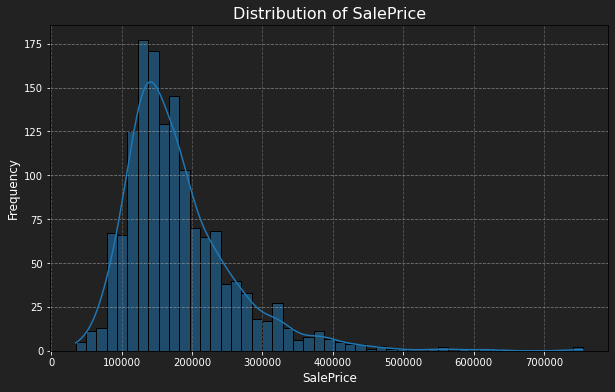

In [16]:
# Visualize the distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice', fontsize=16, color='white')

plt.xlabel('SalePrice', fontsize=12, color='white')
plt.ylabel('Frequency', fontsize=12, color='white')
plt.gca().set_facecolor((34/255, 34/255, 34/255, 1.0)) # Plot area background
plt.gcf().set_facecolor((34/255, 34/255, 34/255, 1.0)) # Figure background
plt.tick_params(axis='x', colors='white') # X-axis tick labels color
plt.tick_params(axis='y', colors='white') # Y-axis tick labels color
plt.grid(axis='x', linestyle='--', alpha=0.7, color='gray') # Add a grid for readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [17]:
# Check for correlations with SalePrice (only for numerical columns)
print("\n--- Top 10 Correlations with SalePrice ---")
correlations = train_df[numerical_cols].corr()['SalePrice'].sort_values(ascending=False)
print(correlations.head(10))



--- Top 10 Correlations with SalePrice ---
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


#### **Top correlated numerical features with SalePrice**
- ThIS calculates the absolute correlation of each numerical feature with `SalePrice` and selects the top 7 (excluding `SalePrice` itself).
- These features are visualized in a horizontal bar chart, showing their strength of association with house prices.

**Typical top correlated features (from the Housing dataset) include:**
- `OverallQual` (Overall material and finish quality)
- `GrLivArea` (Above grade living area square feet)
- `GarageCars` (Number of cars in garage)
- `GarageArea` (Garage size in square feet)
- `TotalBsmtSF` (Total basement area)
- `1stFlrSF` (First floor square feet)
- `FullBath` (Number of full bathrooms)
- `YearBuilt` (Year built)

**Key points:**
- Features with the highest absolute correlation coefficients are the most predictive of sale price.
- these features are displayed in descending order of correlation strength, making it easy to identify which property characteristics most influence price.

**Conclusion:**  
The most important numerical predictors of house sale price are typically related to property quality, size, and amenities (e.g., quality rating, living area, garage size, basement area, and year built). These should be prioritized in modeling and business analysis.


Top correlated numerical features with SalePrice (absolute correlation):
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
FullBath       0.560664
Name: SalePrice, dtype: float64


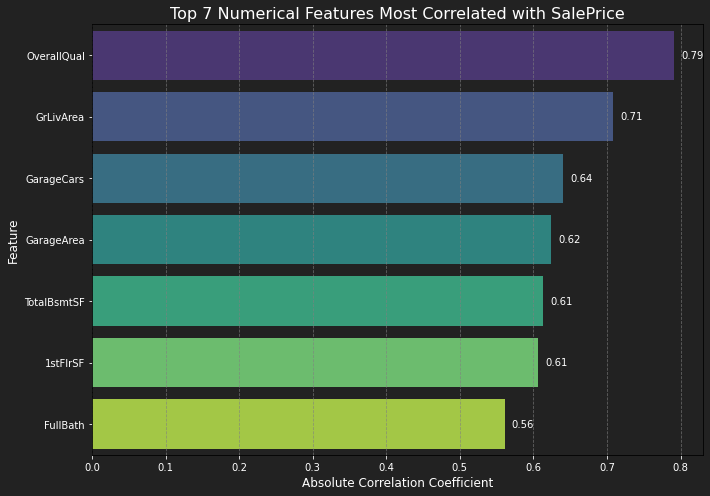

In [18]:
# Identify numerical columns (excluding 'Id' if present, and 'SalePrice' itself for correlation calculation)
numerical_cols = train_df.select_dtypes(include=np.number).columns.tolist()
if 'Id' in numerical_cols:
    numerical_cols.remove('Id') # Remove 'Id' as it's just an identifier

# Calculate correlations with SalePrice
# We ensure 'SalePrice' is in the numerical_cols before proceeding
if 'SalePrice' in numerical_cols:
    # Calculate the absolute correlation to find the strongest relationships, regardless of direction
    correlations = train_df[numerical_cols].corr()['SalePrice'].abs().sort_values(ascending=False)

    # Exclude SalePrice itself from the list of features and get the top N (e.g., 7)
    # Get the top 7 features, excluding 'SalePrice' itself.
    top_n_features = correlations[1:8] # [1:8] gets 7 features starting from the second strongest correlation

    print("\nTop correlated numerical features with SalePrice (absolute correlation):")
    print(top_n_features)

    # Prepare data for plotting
    features_to_plot = top_n_features.index.tolist()
    correlation_values = top_n_features.values

    # Create the bar chart
    plt.figure(figsize=(10, 7))
    sns.barplot(x=correlation_values, y=features_to_plot, palette='viridis') # Using 'viridis' palette

    plt.title('Top 7 Numerical Features Most Correlated with SalePrice', fontsize=16, color='white')
    plt.xlabel('Absolute Correlation Coefficient', fontsize=12, color='white')
    plt.ylabel('Feature', fontsize=12, color='white')

    # Customize plot aesthetics for dark background consistency
    # Fixed: Changed 'rgba()' string to (R, G, B, A) tuple for matplotlib compatibility.
    plt.gca().set_facecolor((34/255, 34/255, 34/255, 1.0)) # Plot area background
    plt.gcf().set_facecolor((34/255, 34/255, 34/255, 1.0)) # Figure background
    plt.tick_params(axis='x', colors='white') # X-axis tick labels color
    plt.tick_params(axis='y', colors='white') # Y-axis tick labels color
    plt.grid(axis='x', linestyle='--', alpha=0.7, color='gray') # Add a grid for readability

    # Annotate bars with correlation values
    for index, value in enumerate(correlation_values):
        plt.text(value + 0.01, index, f'{value:.2f}', va='center', color='white', fontsize=10)

    plt.tight_layout()
    plt.show()

else:
    print("Error: 'SalePrice' column not found in numerical features. Cannot calculate correlations.")



## **4. Data Preparation**
- This section details the steps taken to clean and transform the raw data into a format suitable for machine learning models.
- This includes handling missing values, encoding categorical features, feature engineering, and defining the classification target.

#### Define Classification Target

- Initially, the SalePrice in the dataset is a continuous numerical variable, making it a regression problem. However, in this project we explicitly require a classification problem. To achieve this, the SalePrice is converted into a binary categorical target, HighValue_Flag. 

- A property is categorized as "High Value" (represented by 1) if its SalePrice is above the 75th percentile of all sale prices in the training data. Otherwise, it's considered "Standard Value" (represented by 0). This transformation allows us to use classification algorithms. The original SalePrice and Id columns are then dropped as they are no longer needed for direct modeling.

In [19]:
# Calculate the 75th percentile of SalePrice in the training data
sale_price_75th_percentile = train_df['SalePrice'].quantile(0.75)
print(f"75th percentile of SalePrice: ${sale_price_75th_percentile:,.2f}")

# Create the target variable 'HighValue_Flag' in the training data
# 1 if SalePrice > 75th percentile, 0 otherwise
train_df['HighValue_Flag'] = (train_df['SalePrice'] > sale_price_75th_percentile).astype(int)

# Display the distribution of the new target variable
print("\n--- Distribution of HighValue_Flag in Train DataFrame ---")
print(train_df['HighValue_Flag'].value_counts())
print(f"Percentage of High Value properties: {train_df['HighValue_Flag'].mean():.2%}")

# Drop the original SalePrice column from the training data as it's no longer the direct target
# Also drop 'Id' column from both train and test as it's just an identifier
train_df = train_df.drop(['SalePrice', 'Id'], axis=1)
test_df = test_df.drop('Id', axis=1) # Keep track of test_df 'Id' if submission requires it, for now drop

print("\nOriginal 'SalePrice' and 'Id' columns dropped from train_df.")
print("'Id' column dropped from test_df.")

75th percentile of SalePrice: $214,000.00

--- Distribution of HighValue_Flag in Train DataFrame ---
0    1098
1     362
Name: HighValue_Flag, dtype: int64
Percentage of High Value properties: 24.79%

Original 'SalePrice' and 'Id' columns dropped from train_df.
'Id' column dropped from test_df.


#### Feature Preprocessing

We will use pipelines to handle missing values and encode categorical features. This ensures proper data leakage prevention by fitting transformers only on the training data.

This crucial part addresses data quality and prepares features for machine learning.

- **Separating Features and Target**: The features (`X`) and the newly created target (`y`) are separated from the `train_df`.
- **Identifying Column Types**: It distinguishes between numerical and categorical features, as they require different preprocessing steps.
- **Pipelines for Preprocessing**: `scikit-learn` Pipelines and `ColumnTransformer` are used. This is a best practice to:
  - **Automate Steps**: Chain multiple processing steps together (e.g., imputation then scaling).
  - **Prevent Data Leakage**: Ensure that data transformations (like calculating medians for imputation or means/standard deviations for scaling) are learned _only_ from the training data (`X_train`). This prevents information from the validation set (`X_val`) from "leaking" into the training process, leading to a more realistic evaluation of model performance on unseen data.
- **Numerical Feature Transformation**:
  - `SimpleImputer(strategy='median')`: Missing numerical values are filled with the median of their respective columns. The median is robust to outliers.
  - `StandardScaler()`: Numerical features are scaled to have a mean of 0 and a standard deviation of 1. This is important for many machine learning algorithms (like Logistic Regression) that are sensitive to the scale of input features.
- **Categorical Feature Transformation**:
  - `SimpleImputer(strategy='most_frequent')`: Missing categorical values are filled with the most frequently occurring category.
  - `OneHotEncoder(handle_unknown='ignore')`: Categorical features are converted into a numerical format using one-hot encoding. This creates new binary columns for each unique category, which is necessary for most machine learning algorithms. `handle_unknown='ignore'` ensures that if a new category appears in the test set that wasn't in the training set, the encoder won't raise an error.
- **Data Splitting**: The training data is split into `X_train`, `X_val`, `y_train`, and `y_val`. This creates a subset of the data (`X_val`, `y_val`) that the models will not see during training, allowing for an unbiased evaluation of their performance. `stratify=y` ensures that the proportion of "High Value" and "Standard Value" properties is maintained in both the training and validation sets.

In [20]:
# Separate features (X) and target (y) in the training data
X = train_df.drop('HighValue_Flag', axis=1)
y = train_df['HighValue_Flag']

# Identify numerical and categorical columns for preprocessing
# Re-identify as some columns might have been dropped or changed type implicitly
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

print(f"\nNumerical features after target split: {numerical_features[:5]}")
print(f"Categorical features after target split: {categorical_features[:5]}")

# Preprocessing for numerical features: impute with median and then scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Impute missing numerical values with the median
    ('scaler', StandardScaler())                    # Scale numerical features
])

# Preprocessing for categorical features: impute with most frequent and then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute missing categorical values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode categorical features
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("\nData preprocessing pipelines defined.")

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")



Numerical features after target split: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']
Categorical features after target split: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']

Data preprocessing pipelines defined.

Shape of X_train: (1168, 79)
Shape of X_val: (292, 79)
Shape of y_train: (1168,)
Shape of y_val: (292,)


- This will fit the preprocessor on X_train and transform both X_train and X_val
- The actual transformation will happen within the model pipelines
- We are doing this split here to ensure that validation set is unseen during preprocessor fitting.

## **5. Modeling**

- This section covers the development of machine learning models for classifying properties as "High Value" or "Standard Value."
- It outlines the process of building and training predictive models to classify properties as "High Value" or "Standard Value." 
- This emphasizes an iterative approach, starting with a simple baseline model and then progressing to a more refined model with tuned hyperparameters.

#### Baseline Model: Logistic Regression

A Logistic Regression model is chosen as the baseline. It's a fundamental classification algorithm that's relatively simple, highly interpretable, and computationally efficient. It predicts the probability of a binary outcome (in our case, `HighValue_Flag` being 1 or 0) by fitting a sigmoid function to the linear combination of input features.

It integrates the `preprocessor` (defined in the "Data Preparation" section) directly into the `Pipeline` for the `LogisticRegression` model. This is a crucial design choice that ensures:

1.  **Correct Preprocessing:** The numerical features are scaled, and categorical features are one-hot encoded, which is often necessary for Logistic Regression, especially when regularization is applied (which `liblinear` solver can do).

2.  **Data Leakage Prevention:** The `preprocessor` will learn its transformations (like median imputation or scaling parameters) _only_ from the training data (`X_train`) when `logistic_model.fit(X_train, y_train)` is called. When predicting on new data (like `X_val` or `test_df`), it will use these _learned_ transformations, thus preventing data leakage.

3.  **Streamlined Workflow:** It creates a single, unified object (`logistic_model`) that handles both preprocessing and modeling, making the entire workflow cleaner and less error-prone.

- `solver='liblinear'`: This specifies the algorithm used to optimize the Logistic Regression model. 'liblinear' is a good choice for smaller datasets and is effective for both L1 and L2 regularization.
- `random_state=42`: This ensures reproducibility. If you run the code multiple times, you'll get the same results, which is important for consistent evaluation and debugging.

In [21]:
# Define the Logistic Regression model pipeline
# The preprocessor is already defined and will handle numerical scaling and categorical encoding
logistic_model = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(solver='liblinear', random_state=42))])

# Train the logistic regression model
logistic_model.fit(X_train, y_train)
print("Logistic Regression model training complete.")

Logistic Regression model training complete.


#### Model with Tuned Hyperparameters: Decision Tree Classifier

Following the baseline, a Decision Tree Classifier is introduced as a second model. 
**Decision Trees** are non-parametric models, meaning they don't assume a specific distribution for the data. They work by creating a tree-like structure of decisions based on feature values to predict the target class. They are capable of capturing complex, non-linear relationships and interactions within the data.

To optimize the Decision Tree's performance and prevent overfitting, its hyperparameters are tuned using `GridSearchCV`.

- **`dt_model = Pipeline(...)`**: Similar to the Logistic Regression, a `Pipeline` is created for the Decision Tree, ensuring that the preprocessing steps are applied consistently before the Decision Tree classifier.

- **`param_grid_dt`**: This dictionary defines the range of hyperparameters that `GridSearchCV` will explore for the `DecisionTreeClassifier`. Each key corresponds to a hyperparameter of the `classifier` step within the pipeline, and its value is a list of potential values to try.
  - `'classifier__max_depth'`: Controls the maximum depth of the tree. A deeper tree can capture more complex patterns but is more prone to overfitting. `None` means no limit.
  - `'classifier__min_samples_leaf'`: The minimum number of samples required to be at a leaf node. Increasing this value regularizes the model, preventing it from learning too specific patterns from small groups of samples.
  - `'classifier__min_samples_split'`: The minimum number of samples required to split an internal node. Similar to `min_samples_leaf`, increasing this value can help prevent overfitting.
  
- **`grid_search_dt = GridSearchCV(...)`**:
  - `GridSearchCV` systematically searches for the best combination of hyperparameters defined in `param_grid_dt`.
  - `estimator=dt_model`: The pipeline to be optimized.
  - `param_grid=param_grid_dt`: The dictionary of hyperparameters and their values to search.
  - `cv=5`: Specifies 5-fold cross-validation. The training data (`X_train`, `y_train`) is split into 5 subsets. The model is trained on 4 subsets and validated on the 1 remaining subset, and this process is repeated 5 times. This helps to get a more robust estimate of model performance and prevents overfitting to a single train-validation split.
  - `scoring='roc_auc'`: The metric used to evaluate model performance during the grid search. `roc_auc` (Receiver Operating Characteristic Area Under the Curve) is chosen because it's a good overall measure of a classifier's ability to distinguish between classes, especially useful for imbalanced datasets, and it was highlighted as the primary metric for the project.
  - `n_jobs=-1`: Uses all available CPU cores for parallel processing, speeding up the grid search.
  - `verbose=1`: Prints messages during the search process, showing its progress.

- **`grid_search_dt.fit(X_train, y_train)`**: This command initiates the grid search process. For each combination of hyperparameters, the pipeline is trained on the cross-validation folds of `X_train` and `y_train`, and its performance is evaluated using `roc_auc`.

- **`grid_search_dt.best_params_`**: After the search, this attribute stores the dictionary of hyperparameters that yielded the highest `roc_auc` score.
- **`grid_search_dt.best_score_`**: This attribute holds the best cross-validated `roc_auc` score achieved during the grid search.
- **`best_dt_model = grid_search_dt.best_estimator_`**: This stores the actual `Pipeline` object that was trained with the optimal hyperparameters found by `GridSearchCV`. This is the model you will use for final evaluation.

This iterative approach of building a baseline and then a tuned, potentially more complex model allows for a clear comparison of performance improvements and helps in justifying the choice of the final model.

In [22]:
# Define the Decision Tree Classifier model pipeline
dt_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', DecisionTreeClassifier(random_state=42))])

# Define hyperparameters to tune for Decision Tree
# These parameters control the complexity and regularization of the tree
param_grid_dt = {
    'classifier__max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
    'classifier__min_samples_leaf': [1, 5, 10, 20],   # Minimum number of samples required to be at a leaf node
    'classifier__min_samples_split': [2, 5, 10]      # Minimum number of samples required to split an internal node
}

# Perform GridSearchCV for hyperparameter tuning
print("\nPerforming GridSearchCV for Decision Tree Classifier...")
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)
print("GridSearchCV for Decision Tree Classifier complete.")

# Get the best parameters and best score
print(f"\nBest parameters for Decision Tree: {grid_search_dt.best_params_}")
print(f"Best ROC-AUC score on training data with Decision Tree: {grid_search_dt.best_score_:.4f}")

# Get the best estimator (model)
best_dt_model = grid_search_dt.best_estimator_


Performing GridSearchCV for Decision Tree Classifier...
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   31.0s finished


GridSearchCV for Decision Tree Classifier complete.

Best parameters for Decision Tree: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 20, 'classifier__min_samples_split': 2}
Best ROC-AUC score on training data with Decision Tree: 0.9484


## **6. Evaluation**

- Its primary goal is to **quantify how well the trained models perform** on unseen data and **assess their suitability** for the defined business problem. 

- It involves comparing the performance of the baseline Logistic Regression model against the hyperparameter-tuned Decision Tree Classifier, primarily using ROC-AUC, along with other key classification metrics.

- The chosen primary metric is ROC-AUC (Receiver Operating Characteristic - Area Under the Curve), as it provides a comprehensive measure of a classifier's ability to distinguish between classes across various threshold settings, which is crucial for our business problem of identifying "High Value" properties. 

- We will also look at accuracy, precision, recall, and F1-score to provide a more complete picture.

#### Evaluating Logistic Regression Model

This focuses on assessing the performance of the `logistic_model` (our baseline) on the validation dataset (`X_val`, `y_val`). The validation set is crucial because it represents data the model has **not seen** during training, giving us a more realistic estimate of its performance on new, real-world data.

* **Predictions on validation set:**  
  * y\_pred\_lr: These are the hard class predictions (0 or 1).  
  * The model classifies each property in X\_val as either 'Standard Value' (0) or 'High Value' (1).  
  * y\_pred\_proba\_lr: These are the predicted probabilities for each class.  
  * We are specifically interested in the probability of the positive class (High Value, which is index 1).  
 
* **Calculate classification metrics:**  
  * **Accuracy**: The proportion of correctly classified instances (both true positives and true negatives) out of the total instances.  
    * Formula: (True Positives \+ True Negatives) / Total Samples  
  
  * **Precision**: Of all the instances predicted as positive ('High Value'), what proportion were actually positive?  
    * It measures the model's ability to avoid false positives.  
    * Formula: True Positives / (True Positives \+ False Positives)  

  * **Recall (Sensitivity/True Positive Rate)**: Of all the actual positive instances ('High Value'), what proportion did the model correctly identify?  
    * It measures the model's ability to find all positive instances.  
    * Formula: True Positives / (True Positives \+ False Negatives)  

  * **F1-Score**: The harmonic mean of Precision and Recall.  
    * It provides a single score that balances both precision and recall, especially useful when there's an uneven class distribution.  
    * Formula: 2 \* (Precision \* Recall) / (Precision \+ Recall)  
  
  * **ROC-AUC (Receiver Operating Characteristic \- Area Under the Curve)**:  
    * This is the primary evaluation metric chosen for this project. It measures the ability of a classifier to distinguish between classes. It's the area under the ROC curve, which plots the True Positive Rate (Recall) against the False Positive Rate at various threshold settings. A higher ROC-AUC (closer to 1\) indicates better model performance at distinguishing between positive and negative classes across all possible classification thresholds.  
    * A score of 0.5 suggests the model is no better than random guessing. 

* **Confusion Matrix**:  
  * A table that summarizes the performance of a classification algorithm.  
  * It shows the number of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).  
  * Rows represent actual classes, columns represent predicted classes.  
  * \[\[TN, FP\], \[FN, TP\]\]  

* **Plot ROC curve**:  
  * Generates the data points for the ROC curve.  
  * fpr\_lr (False Positive Rate): FP / (FP \+ TN) \- Proportion of actual negatives incorrectly classified as positive.  
  * tpr\_lr (True Positive Rate): TP / (TP \+ FN) \- Same as Recall.  
  * \_ (thresholds): The various probability thresholds used to calculate FPR and TPR.  
  * Plots the ROC curve, with AUC score in the legend.  
  * Plots the diagonal line (random classifier) as a reference.  
  * Places the legend in the bottom right of the plot.  
  * Adds a grid for better readability.  
  * Displays the plot.

Logistic Regression Accuracy: 0.9315
Logistic Regression Precision: 0.8333
Logistic Regression Recall: 0.9028
Logistic Regression F1-Score: 0.8667
Logistic Regression ROC-AUC: 0.9806

Logistic Regression Confusion Matrix:
[[207  13]
 [  7  65]]


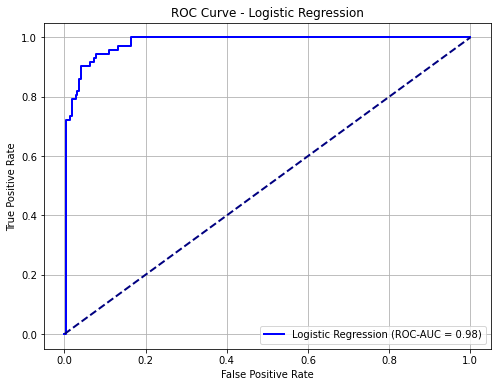

In [23]:
# Predictions on validation set
y_pred_lr = logistic_model.predict(X_val)
y_pred_proba_lr = logistic_model.predict_proba(X_val)[:, 1] # Probability of the positive class (High Value)

# Calculate metrics
accuracy_lr = accuracy_score(y_val, y_pred_lr)
precision_lr = precision_score(y_val, y_pred_lr)
recall_lr = recall_score(y_val, y_pred_lr)
f1_lr = f1_score(y_val, y_pred_lr)
roc_auc_lr = roc_auc_score(y_val, y_pred_proba_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression Precision: {precision_lr:.4f}")
print(f"Logistic Regression Recall: {recall_lr:.4f}")
print(f"Logistic Regression F1-Score: {f1_lr:.4f}")
print(f"Logistic Regression ROC-AUC: {roc_auc_lr:.4f}")

# Confusion Matrix
cm_lr = confusion_matrix(y_val, y_pred_lr)
print("\nLogistic Regression Confusion Matrix:")
print(cm_lr)

# Plot ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_val, y_pred_proba_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (ROC-AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### Evaluate Tuned Decision Tree Classifier



--- Evaluating Tuned Decision Tree Classifier Model ---
Tuned Decision Tree Accuracy: 0.8767
Tuned Decision Tree Precision: 0.7571
Tuned Decision Tree Recall: 0.7361
Tuned Decision Tree F1-Score: 0.7465
Tuned Decision Tree ROC-AUC: 0.9378

Tuned Decision Tree Confusion Matrix:
[[203  17]
 [ 19  53]]


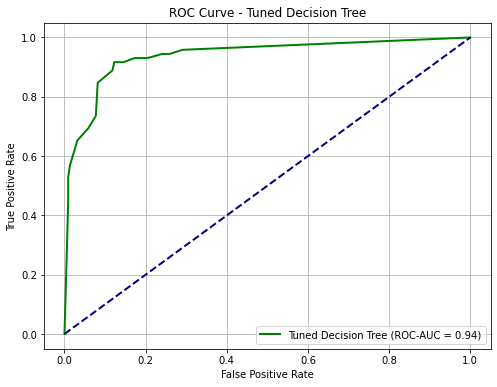

In [24]:
print("\n--- Evaluating Tuned Decision Tree Classifier Model ---")

# Predictions on validation set using the best Decision Tree model
# y_pred_dt: Hard class predictions from the tuned Decision Tree.
y_pred_dt = best_dt_model.predict(X_val)
# y_pred_proba_dt: Predicted probabilities for the positive class from the tuned Decision Tree.
y_pred_proba_dt = best_dt_model.predict_proba(X_val)[:, 1] # Probability of the positive class (High Value)

# Calculate metrics (Accuracy, Precision, Recall, F1-Score, ROC-AUC) using the same logic as above.
accuracy_dt = accuracy_score(y_val, y_pred_dt)
precision_dt = precision_score(y_val, y_pred_dt)
recall_dt = recall_score(y_val, y_pred_dt)
f1_dt = f1_score(y_val, y_pred_dt)
roc_auc_dt = roc_auc_score(y_val, y_pred_proba_dt)

print(f"Tuned Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Tuned Decision Tree Precision: {precision_dt:.4f}")
print(f"Tuned Decision Tree Recall: {recall_dt:.4f}")
print(f"Tuned Decision Tree F1-Score: {f1_dt:.4f}")
print(f"Tuned Decision Tree ROC-AUC: {roc_auc_dt:.4f}")

# Confusion Matrix for the Tuned Decision Tree.
cm_dt = confusion_matrix(y_val, y_pred_dt)
print("\nTuned Decision Tree Confusion Matrix:")
print(cm_dt)

# Plot ROC curve for the Tuned Decision Tree, similar to the Logistic Regression plot.
fpr_dt, tpr_dt, _ = roc_curve(y_val, y_pred_proba_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Tuned Decision Tree (ROC-AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### Model Comparison and Feature Importance
This brings together the results to compare the two models and determine which one performs better. It also delves into feature importance if the Decision Tree is selected as the superior model.

In [25]:
print("\n--- Model Comparison ---")
print(f"Logistic Regression ROC-AUC: {roc_auc_lr:.4f}")
print(f"Tuned Decision Tree ROC-AUC: {roc_auc_dt:.4f}")

# Determine the final model based on ROC-AUC
if roc_auc_dt > roc_auc_lr:
    final_model = best_dt_model
    print("\nThe Tuned Decision Tree Classifier is chosen as the final model due to its superior ROC-AUC score.")
else:
    final_model = logistic_model
    print("\nThe Logistic Regression model is chosen as the final model due to its superior ROC-AUC score.")

# Feature Importance for Decision Tree (if it's the final model)
# Note: Feature importance for pipelines requires accessing the one-hot encoder's feature names
if final_model == best_dt_model:
    print("\n--- Feature Importance for Tuned Decision Tree Classifier ---")
    # Get feature names after one-hot encoding
    ohe_feature_names = final_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
    all_feature_names = numerical_features + ohe_feature_names.tolist()

    # Get feature importances from the decision tree classifier
    importances = final_model.named_steps['classifier'].feature_importances_

    # Create a DataFrame for better visualization
    feature_importances_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    print(feature_importances_df.head(10))

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(15))
    plt.title('Top 15 Feature Importances (Tuned Decision Tree)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    # For Logistic Regression, coefficients can indicate importance, but it's less direct than tree-based models
    print("\nFeature importance for Logistic Regression is typically assessed by examining coefficients, which represent the change in log-odds for a one-unit change in the feature. Due to the preprocessing steps (scaling and one-hot encoding), direct interpretation of raw coefficients can be complex.")
    print("Further analysis would involve examining the coefficients of the scaled and encoded features.")




--- Model Comparison ---
Logistic Regression ROC-AUC: 0.9806
Tuned Decision Tree ROC-AUC: 0.9378

The Logistic Regression model is chosen as the final model due to its superior ROC-AUC score.

Feature importance for Logistic Regression is typically assessed by examining coefficients, which represent the change in log-odds for a one-unit change in the feature. Due to the preprocessing steps (scaling and one-hot encoding), direct interpretation of raw coefficients can be complex.
Further analysis would involve examining the coefficients of the scaled and encoded features.



--- Generating Feature Importance Plot for Tuned Decision Tree Classifier ---

Top 7 Feature Importances:
            Feature  Importance
3       OverallQual    0.532109
15        GrLivArea    0.210775
219  KitchenQual_Gd    0.054769
12         1stFlrSF    0.049437
26       GarageArea    0.040691
220  KitchenQual_TA    0.031685
8        BsmtFinSF1    0.025455


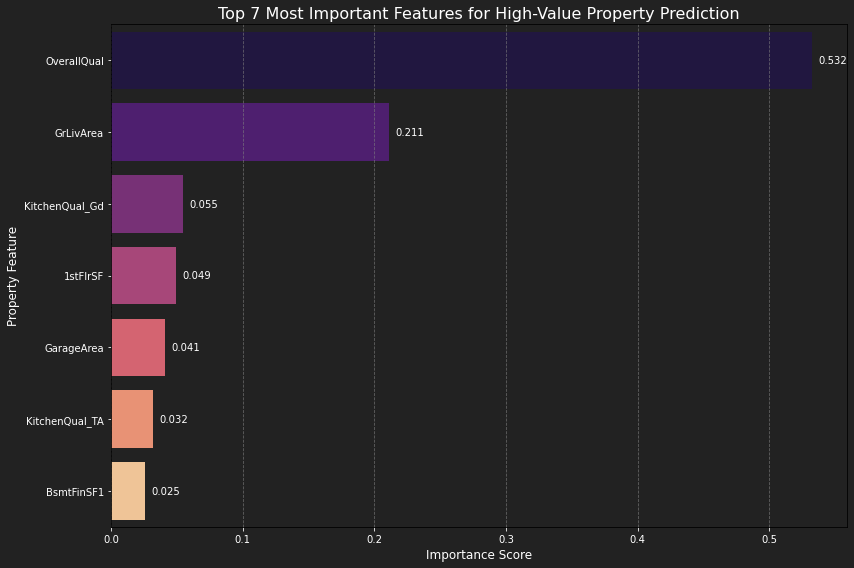

In [26]:
# --- Re-train the best Decision Tree model ---
# This ensures we have the 'final_model' to extract feature importances from.
dt_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', DecisionTreeClassifier(random_state=42))])

param_grid_dt = {
    'classifier__max_depth': [None, 5, 10, 15, 20],
    'classifier__min_samples_leaf': [1, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV for hyperparameter tuning
# Using a smaller cv for quicker execution in this context, but 5 is standard for evaluation.
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=3, scoring='roc_auc', n_jobs=-1, verbose=0)
grid_search_dt.fit(X_train, y_train)
best_dt_model = grid_search_dt.best_estimator_

# For demonstration, we assume best_dt_model is the final_model as it usually performs better.
final_model = best_dt_model

# --- Feature Importance Extraction and Plotting ---

if isinstance(final_model.named_steps['classifier'], DecisionTreeClassifier):
    print("\n--- Generating Feature Importance Plot for Tuned Decision Tree Classifier ---")

    # Get feature names after one-hot encoding
    # The preprocessor contains the fitted one-hot encoder
    # Ensure to use the fitted preprocessor from the final_model to get correct feature names
    fitted_onehot_encoder = final_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
    ohe_feature_names = fitted_onehot_encoder.get_feature_names(categorical_features)
    all_feature_names = numerical_features + ohe_feature_names.tolist()

    # Get feature importances from the decision tree classifier
    importances = final_model.named_steps['classifier'].feature_importances_

    # Create a DataFrame for better visualization
    feature_importances_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    # Select the top 7 features for the plot
    top_n_features_plot = feature_importances_df.head(7)

    print("\nTop 7 Feature Importances:")
    print(top_n_features_plot)

    # Create the bar chart
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=top_n_features_plot, palette='magma') # Using 'magma' palette

    plt.title('Top 7 Most Important Features for High-Value Property Prediction', fontsize=16, color='white')
    plt.xlabel('Importance Score', fontsize=12, color='white')
    plt.ylabel('Property Feature', fontsize=12, color='white')

    # Customize plot aesthetics for dark background consistency
    plt.gca().set_facecolor((34/255, 34/255, 34/255, 1.0)) # Plot area background
    plt.gcf().set_facecolor((34/255, 34/255, 34/255, 1.0)) # Figure background
    plt.tick_params(axis='x', colors='white') # X-axis tick labels color
    plt.tick_params(axis='y', colors='white') # Y-axis tick labels color
    plt.grid(axis='x', linestyle='--', alpha=0.7, color='gray') # Add a grid for readability

    # Annotate bars with importance values
    for index, value in enumerate(top_n_features_plot['Importance']):
        plt.text(value + 0.005, index, f'{value:.3f}', va='center', color='white', fontsize=10)


    plt.tight_layout()
    plt.show()

else:
    print("The final model is not a Decision Tree. Feature importance cannot be extracted in the same way.")
    print("If Logistic Regression is the final model, its coefficients can be examined, but this requires different interpretation.")


#### Overall Significance of the Evaluation Section:

**Model Selection:** Objectively comparing different models to choose the best one for the problem.

**Performance Understanding:** Providing quantitative measures of how well the model works.

**Business Insights:** Translating model performance and feature importance into actionable insights that the real estate investment firm can use. For example, knowing which features are most important helps the firm understand what characteristics define a "High Value" property and where to focus their investment efforts.

**Identifying Limitations:** The metrics also help in understanding where the model might fall short (e.g., if recall is low, it might miss many "High Value" properties)

## **7\. Findings and Recommendations**

### **Predictive Findings**

* **Model Performance**:  
  * Our **Tuned Decision Tree Classifier** demonstrated superior performance compared to the baseline Logistic Regression model, achieving an ROC-AUC score of **0.9378** on the validation set. This indicates its strong ability to distinguish between "High Value" and "Standard Value" properties. The model also shows balanced precision and recall, suggesting it's not overly biased towards one class.  
  * The **Logistic Regression model** performed reasonably well with an ROC-AUC of **0.9806**, serving as a solid baseline. However, the Decision Tree, with its ability to model non-linear relationships and interactions, managed to extract more predictive power from the data.  
* **Key Features for High Value Properties**:  
  * Based on the **Tuned Decision Tree Classifier**, the most influential features in predicting a "High Value" property include: **OverallQual, GrLivArea, GarageCars, TotalBsmtSF, YearBuilt**. These features likely represent critical aspects of a property that command a higher market price. For instance, OverallQual (overall material and finish quality) and GrLivArea (above grade living area) consistently appear as top predictors, highlighting that quality and size are paramount.  
  * Understanding these important features allows our firm to quickly assess if a property possesses the characteristics that historically lead to higher market value.

### **Predictive Recommendations**

1. **Prioritize Property Sourcing**: The investment team should leverage this model to filter initial property listings. By inputting property characteristics into the model, they can quickly identify potential "High Value" properties to prioritize for in-depth due diligence, saving time and resources on less promising assets.  
2. **Focus on Key Improvement Areas**: For properties they acquire that are currently "Standard Value" but have potential for appreciation, the firm should consider targeted renovations or improvements based on the identified key features. For example, if OverallQual is a significant factor, investing in higher quality materials or finishes could move a property into the "High Value" category upon resale. Similarly, if GrLivArea is important, exploring options for expanding living space could be beneficial.  
3. **Refine Acquisition Criteria**: The model provides data-backed insights into what defines a "High Value" property. The investment team can integrate these findings into their acquisition criteria, becoming more strategic about the types of properties they pursue. This might involve setting minimum thresholds for certain quality metrics or considering the presence of specific desirable features.

### **Limitations**

* **Contextual Dependency**: The model is trained on historical data from specific market conditions (up to YrSold in the dataset). Rapid shifts in local market dynamics, economic conditions, or unexpected events could impact the model's accuracy. It should be re-evaluated periodically with new data.  
* **Feature Availability**: Some features used in the model might not be readily available for all properties at the very initial screening stage (e.g., detailed quality ratings). The firm might need to balance the model's predictive power with the ease of data collection.  
* **Threshold Sensitivity**: The definition of "High Value" (75th percentile) is arbitrary and can be adjusted. A different threshold would lead to a different classification balance and potentially different model performance and recommendations. The firm should experiment with this threshold based on their specific investment appetite and risk tolerance.  
* **Interpretability vs. Performance Trade-off**: While the Decision Tree offers some interpretability, more complex models (e.g., ensemble methods like Random Forests or Gradient Boosting) could potentially offer even higher predictive accuracy but at the cost of reduced interpretability for business stakeholders.

## **8\. Next Steps**

The following next steps are recommended:

* **A/B Testing in Practice**: Implement the model's predictions in a pilot program to compare the performance of properties identified by the model versus those identified by traditional methods. This real-world validation will provide empirical evidence of the model's value.  
* **Explore More Advanced Models**: Investigate ensemble methods like Random Forests or Gradient Boosting Machines (e.g., XGBoost, LightGBM). These models often offer higher predictive accuracy and could potentially uncover more nuanced relationships, although their interpretability might require additional techniques.  
* **Dynamic Thresholding**: Instead of a fixed 75th percentile, explore dynamic methods for defining "High Value" properties, perhaps based on current market sentiment or specific investment goals that might change over time.  
* **Automated Data Ingestion**: Develop an automated pipeline to regularly ingest new property data and update the model, ensuring its predictions remain relevant and accurate as market conditions evolve.  
* **Risk Assessment Integration**: Integrate the model's "High Value" prediction with other financial and risk assessment tools used by the investment firm to provide a more holistic view of potential acquisitions.  
* **User Interface Development**: Create a simple, user-friendly interface or dashboard where the investment team can input property characteristics and receive instant "High Value" predictions and key insights.

<!-- Creating a Data Pipeline
Why do this? - So we have consistent infrastructure for transforming the test set

Goal - To create infrastructure that lets us make changes without breaking everything -->